In [80]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from PIL import Image, ImageOps
import cv2
from sklearn.metrics import confusion_matrix


In [17]:
df = pd.read_pickle(r'/Users/nishantabaral/Desktop/NeuralNetwork/train_set.pkl')

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.694118,0.698039,0.670588,0.505882,0.615686,0.690196,0.674510,0.654902,0.533333,0.666667,...,0.262745,0.258824,0.223529,0.490196,0.850980,0.596078,0.552941,0.647059,0.682353,cat
1,0.360784,0.356863,0.313725,0.313725,0.345098,0.333333,0.349020,0.360784,0.349020,0.400000,...,0.047059,0.047059,0.050980,0.050980,0.062745,0.035294,0.023529,0.094118,0.141176,cat
2,0.329412,0.329412,0.325490,0.325490,0.325490,0.325490,0.325490,0.329412,0.321569,0.317647,...,0.850980,0.835294,0.807843,0.768627,0.745098,0.721569,0.694118,0.654902,0.611765,cat
3,0.517647,0.439216,0.388235,0.396078,0.403922,0.403922,0.407843,0.411765,0.415686,0.419608,...,0.992157,0.992157,0.996078,1.000000,0.988235,0.960784,0.976471,0.968627,0.960784,cat
4,0.188235,0.207843,0.254902,0.305882,0.313725,0.403922,0.454902,0.470588,0.490196,0.396078,...,0.745098,0.721569,0.725490,0.623529,0.333333,0.650980,0.643137,0.639216,0.541176,cat


In [19]:
targets = df["class"]
pixels = df.drop(["class"],axis=1)

In [22]:
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(96, 96), cmap='gray')
	plt.show()


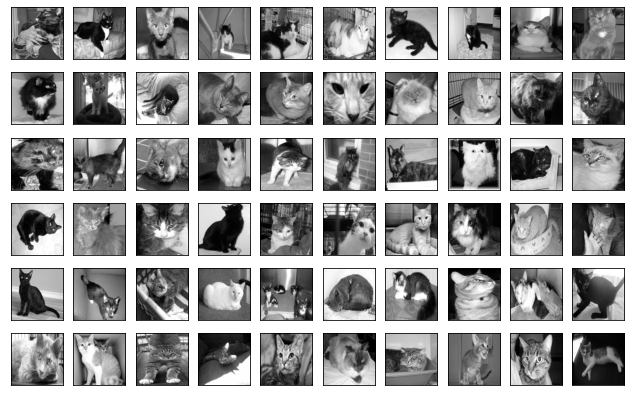

In [23]:
show_orignal_images(pixels)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)


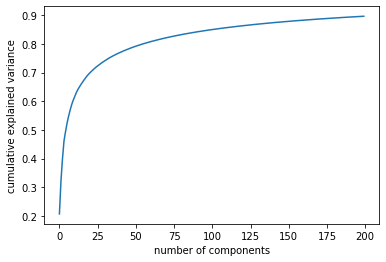

In [29]:
pca = PCA(n_components=200).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


In [37]:
pca.explained_variance_ratio_


array([0.20698127, 0.11386775, 0.07866321, 0.06242257, 0.0324725 ,
       0.0291244 , 0.0244677 , 0.02097348, 0.01909311, 0.01520109,
       0.01359347, 0.01270098, 0.0109731 , 0.00912048, 0.00842528,
       0.00811315, 0.00750176, 0.00744669, 0.00679016, 0.00629507,
       0.00548375, 0.00530816, 0.00504281, 0.00475054, 0.00470866,
       0.00412123, 0.00410542, 0.0039754 , 0.00379528, 0.0035475 ,
       0.00353332, 0.00346526, 0.00337978, 0.00308592, 0.00294699,
       0.00287331, 0.00279039, 0.00270193, 0.00256402, 0.00247547,
       0.00239449, 0.00233254, 0.00231369, 0.00225724, 0.00217424,
       0.00214812, 0.00209097, 0.00204074, 0.00194798, 0.00190134,
       0.00186333, 0.00179353, 0.00176914, 0.00174021, 0.00168007,
       0.00166036, 0.00159387, 0.00157697, 0.00151193, 0.00148178,
       0.00146579, 0.00144749, 0.00140707, 0.00138617, 0.00136146,
       0.0013441 , 0.00132759, 0.00127719, 0.00125126, 0.00122923,
       0.00120772, 0.00120041, 0.00117169, 0.00116291, 0.00114

In [30]:
def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(96, 96), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

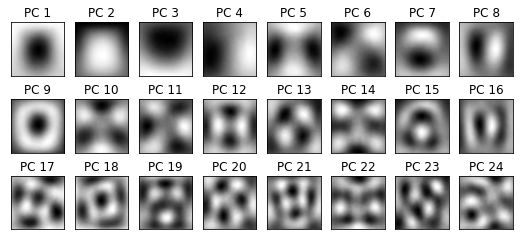

In [31]:

show_eigenfaces(pca)

In [32]:
Xtrain_pca = pca.transform(x_train)


In [33]:
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)


In [38]:
print("Predicting cats or dogs on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))


Predicting cats or dogs on the test set
done in 15.371s
              precision    recall  f1-score   support

         cat       0.63      0.61      0.62      2493
         dog       0.62      0.64      0.63      2515

    accuracy                           0.63      5008
   macro avg       0.63      0.63      0.63      5008
weighted avg       0.63      0.63      0.63      5008



In [82]:
print(confusion_matrix(y_test, y_pred))


[[1516  977]
 [ 900 1615]]
